In [4]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import sklearn
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

sklearn.__version__

'0.20.4'

In [5]:
#plotter and it's utility functions
def get_cloth_dir_names(p1, p2, p3):
    cloth0_dir_names = []
    cloth1_dir_names = []
    cloth2_dir_names = []
    for dir in sorted(os.listdir(p1)):
        cloth0_dir_names.append(p1+"/"+dir)

    for dir in sorted(os.listdir(p2)):
        cloth1_dir_names.append(p2+"/"+dir)

    for dir in sorted(os.listdir(p3)):
        cloth2_dir_names.append(p3+"/"+dir)
    return cloth0_dir_names, cloth1_dir_names, cloth2_dir_names
def create_cloth_datas(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, max_x_len, new_collect = True):
    cloth0_datas = []
    cloth1_datas = []
    cloth2_datas = []
    
    for dir_name in cloth0_dir_names:
        if(new_collect):
            x,y = get_data_XY_new(dir_name)
        else:
            x,y = get_data_XY(dir_name)
        x = pad_time_series(x, max_x_len)
        cloth0_datas.append(x)

    for dir_name in cloth1_dir_names:
        if(new_collect):
            x,y = get_data_XY_new(dir_name)
        else:
            x,y = get_data_XY(dir_name)
        x = pad_time_series(x, max_x_len)
        cloth1_datas.append(x)

    for dir_name in cloth2_dir_names:
        if(new_collect):
            x,y = get_data_XY_new(dir_name)
        else:
            x,y = get_data_XY(dir_name)
        x = pad_time_series(x, max_x_len)
        cloth2_datas.append(x)
    return cloth0_datas, cloth1_datas, cloth2_datas

def get_data_XY(dir_name):
    file_name = dir_name+"/reskin_data.csv"
    data = np.loadtxt(file_name, delimiter = ",")
#     np.savetxt(dir_name+"/reskin_data.csv", data, delimiter =",")
    X = data[:,:-1]
    Y = np.reshape(data[:,-1],(-1,1))
    return X,Y

def get_data_XY_new(dir_name):
    file_name = dir_name+"/reskin_data.csv"
    data = np.loadtxt(file_name, delimiter = ",")
    X = data[:,:-2]
    Y = np.reshape(data[:,-2],(-1,1))
    return X,Y

def pad_time_series(data, new_len):
    val = new_len - data.shape[0]
    if(val%2 == 0):
        left_pad_values = int(val/2)
        right_pad_values = int(val/2)
    elif(val%2 == 1):
        left_pad_values = int(val/2)
        right_pad_values = int(val/2)+1
    new_data = np.zeros((new_len, 15))
    for j in range(data.shape[1]):
        new_data[:,j] = np.pad(data[:,j], (left_pad_values, right_pad_values), mode = "edge")
    return new_data

def mean_min_max(datas, total_num):
    max_len = datas[0].shape[0]
    mean_x = np.zeros((max_len,15))
    max_x = np.ones((max_len,15))*-100000
    min_x = np.ones((max_len,15))*100000
    for j in range(len(datas)):
        mean_x = mean_x + datas[j]
        vals = max_x < datas[j]
        max_x = np.where(vals, datas[j], max_x)
        vals = min_x > datas[j]
        min_x = np.where(vals, datas[j], min_x)
    mean_x = mean_x/total_num
    return mean_x, min_x, max_x

def get_title(i,j):
    dict1 = {0:"center", 1:"top", 2:"right", 3:"bottom", 4:"left"}
    dict2 = {0:"Bx", 1:"By", 2:"Bz"}
    return dict1[i]+" "+dict2[j]

def plot_variance(datas1, datas2, datas3, title, total_trials):
    mean1, min1, max1 = mean_min_max(datas1, total_trials)
    mean2, min2, max2 = mean_min_max(datas2, total_trials)
    mean3, min3, max3 = mean_min_max(datas3, total_trials)
    xdat = np.arange(0,mean1.shape[0],1)
    fig,axes = plt.subplots(5,3)
    for i in range(5):
        for j in range(3):
            axes[i,j].plot(xdat,mean1[:,3*i+j],'r', label = "no_cloth", alpha = 0.5)
            axes[i,j].plot(xdat,mean2[:,3*i+j],'g', label = "1 cloth", alpha = 0.5)
            axes[i,j].plot(xdat,mean3[:,3*i+j],'b', label = "2 cloth", alpha = 0.5)
            axes[i,j].fill_between(xdat,max1[:,3*i+j],min1[:,3*i+j],color='red', alpha=0.2)
            axes[i,j].fill_between(xdat,max2[:,3*i+j],min2[:,3*i+j],color='green', alpha=0.2)
            axes[i,j].fill_between(xdat,max3[:,3*i+j],min3[:,3*i+j],color='blue', alpha=0.2)
            axes[i,j].set_title(get_title(i,j))
    fig.set_size_inches(20, 20)
    fig.suptitle(title, fontsize=16)
    plt.legend()
    plt.show()

def get_max_len(all_dir_names):
    max_x_len = 0
    for dir_name in all_dir_names:
        x,y = get_data_XY(dir_name)
        if(max_x_len < x.shape[0]):
            max_x_len = x.shape[0]
    return max_x_len

def create_clf_plot_from_dir(p1, p2, p3, title, new_collect = True, total_trials=30):
    cloth0_dir_names, cloth1_dir_names, cloth2_dir_names = get_cloth_dir_names(p1, p2, p3)
    max_len = get_max_len(cloth0_dir_names+cloth1_dir_names+cloth2_dir_names)
    cloth0_datas, cloth1_datas, cloth2_datas = create_cloth_datas(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, max_len, new_collect)
    plot_variance(cloth0_datas, cloth1_datas, cloth2_datas, title, total_trials)

In [6]:
#classifier and its utility functions

def get_dataset_dir_names(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, num_train):
    train_dir_names = cloth0_dir_names[0:num_train] + cloth1_dir_names[0:num_train] + cloth2_dir_names[0:num_train]
    test_dir_names = cloth0_dir_names[num_train:] + cloth1_dir_names[num_train:] + cloth2_dir_names[num_train:]
    return train_dir_names, test_dir_names

def get_raw_data(train_dir_names, test_dir_names, new_collect = True):
    X = []
    Y = []
    x_test = []
    y_test = []
    for dir_name in train_dir_names:
        if(new_collect):
            x,y = get_data_XY_new(dir_name)
        else:
            x,y = get_data_XY(dir_name)
        X.append(x)
        Y.append(y)
    X = np.vstack(X)
    Y = np.vstack(Y)
    if(len(test_dir_names)!= 0):
        for dir_name in test_dir_names:
            if(new_collect):
                x,y = get_data_XY_new(dir_name)
            else:
                x,y = get_data_XY(dir_name)
            x_test.append(x)
            y_test.append(y)
        x_test = np.vstack(x_test)
        y_test = np.vstack(y_test)
    return X,Y, x_test, y_test

def normalize_data(X, x_test, x_test_exists=True):
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    if(x_test_exists):
        x_test = scaler.transform(x_test)
        return X, x_test, scaler
    else:
        return X

def get_dataset_from_dir_names(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, num_train, new_collect = True):
    train_dir_names, test_dir_names = get_dataset_dir_names(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, num_train)
    X,Y, x, y = get_raw_data(train_dir_names, test_dir_names, new_collect)
    X, x, scaler = normalize_data(X, x)
    return X,Y,x,y,scaler
    
def create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = True):
    cloth0_dir_names, cloth1_dir_names, cloth2_dir_names = get_cloth_dir_names(p1, p2, p3)
    X,Y,x,y,scaler = get_dataset_from_dir_names(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, num_train, new_collect)
    print(X.shape, Y.shape, x.shape, y.shape)
    clf = neighbors.KNeighborsClassifier(nn, weights="distance")
    clf.fit(X, Y.ravel())
    y_pred = clf.predict(x)
    score = balanced_accuracy_score(y, y_pred)
    print("balanced accuracy: ",score)
    best_cf = confusion_matrix(y, y_pred)
    print("confusion_matrix: ", best_cf)
    return clf, scaler

def plot_classifier_results(clf, test_trials_x, test_trials_y, test_dir_names):
    fig, axes = plt.subplots(len(test_trials_x))
    for i in range(len(test_trials_x)):
        y_pred = clf.predict(test_trials_x[i][:,:])
        score = balanced_accuracy_score(test_trials_y[i][:], y_pred)
        print("balanced accuracy - "+test_dir_names[i]+" : ",score)
        axes[i].plot(test_trials_y[i][:], 'b', label="ground-truth")
        axes[i].plot(y_pred, 'r', label="classifier pred")
        if("0cloth" in test_dir_names[i]):
            axes[i].set_title("0cloth: "+str(i))
        if("1cloth" in test_dir_names[i]):
            axes[i].set_title("1cloth: "+str(i))
        if("2cloth" in test_dir_names[i]):
            axes[i].set_title("2cloth: "+str(i))
        
    fig.set_size_inches(15, 45)
    fig.tight_layout(pad=3.0)
    plt.show()

def get_test_trials_3D(test_dir_names, scaler):
    x_test = []
    y_test = []
    for dir_name in test_dir_names:
        x,y = get_data_XY_new(dir_name)
        x = scaler.transform(x)
        x_test.append(x)
        y_test.append(y)
    return x_test, y_test


def get_test_trials_2D(dir_names, scaler):
    x_test = []
    y_test = []
    for dir_name in dir_names:
        x,y = get_data_XY_new(dir_name)
        x = scaler.transform(x)
        x_test.append(x)
        y_test.append(y)
    x_test = np.vstack(x_test)
    y_test = np.vstack(y_test)
    return x_test, y_test

def get_dir_names(ps):
    dir_names=[]
    for p in ps:
        for dir in sorted(os.listdir(p)):
            dir_names.append(p+"/"+dir)
    return dir_names

def get_clf_accuracy_from_dir(clf, scaler, ps):
    #Testing accuracy for only 1 and 2 cloth case
    dir_names = get_dir_names(ps)
    x, y = get_test_trials_2D(dir_names, scaler)
    y_pred = clf.predict(x)
    score = balanced_accuracy_score(y, y_pred)
    print("balanced accuracy: ",score)
    best_cf = confusion_matrix(y, y_pred)
    print("confusion_matrix: ", best_cf)
    return clf, scaler


In [4]:
#Above code generalized to many dimensions
def get_cloth_dir_names_all(ps):
    res=[]
    for p in ps:
        temp=[]
        for dir in sorted(os.listdir(p)):
            temp.append(p+"/"+dir)
        res.append(temp)
    return res

def get_dataset_from_dir_names_all(cloth_dir_names, percent_train):
    num_train = int((percent_train/100)*len(cloth_dir_names[0]))
    train_dir_names, test_dir_names = get_dataset_dir_names_all(cloth_dir_names,num_train)
    X,Y,x,y= get_raw_data(train_dir_names, test_dir_names)
    X, x, scaler = normalize_data(X, x)
    return X,Y,x,y,scaler
    
    
def get_dataset_dir_names_all(ps, num_train):
    train_dir_names =  []
    test_dir_names = []
    for cloth_dir_name  in ps:
        train_dir_names = train_dir_names + cloth_dir_name[0:num_train]
        test_dir_names = test_dir_names + cloth_dir_name[num_train:]
    return train_dir_names, test_dir_names


def create_knn_clf_from_dir(ps,nn = 10, percent_train=75):
    cloth_dir_names= get_cloth_dir_names_all(ps)
    X,Y,x,y,scaler = get_dataset_from_dir_names_all(cloth_dir_names, percent_train)
    print(X.shape, Y.shape, x.shape, y.shape)
    clf = neighbors.KNeighborsClassifier(nn, weights="distance")
    clf.fit(X, Y.ravel())
    y_pred = clf.predict(x)
    score = balanced_accuracy_score(y, y_pred)
    print("balanced accuracy: ",score)
    best_cf = confusion_matrix(y, y_pred)
    print("confusion_matrix: ", best_cf)
    return clf, scaler

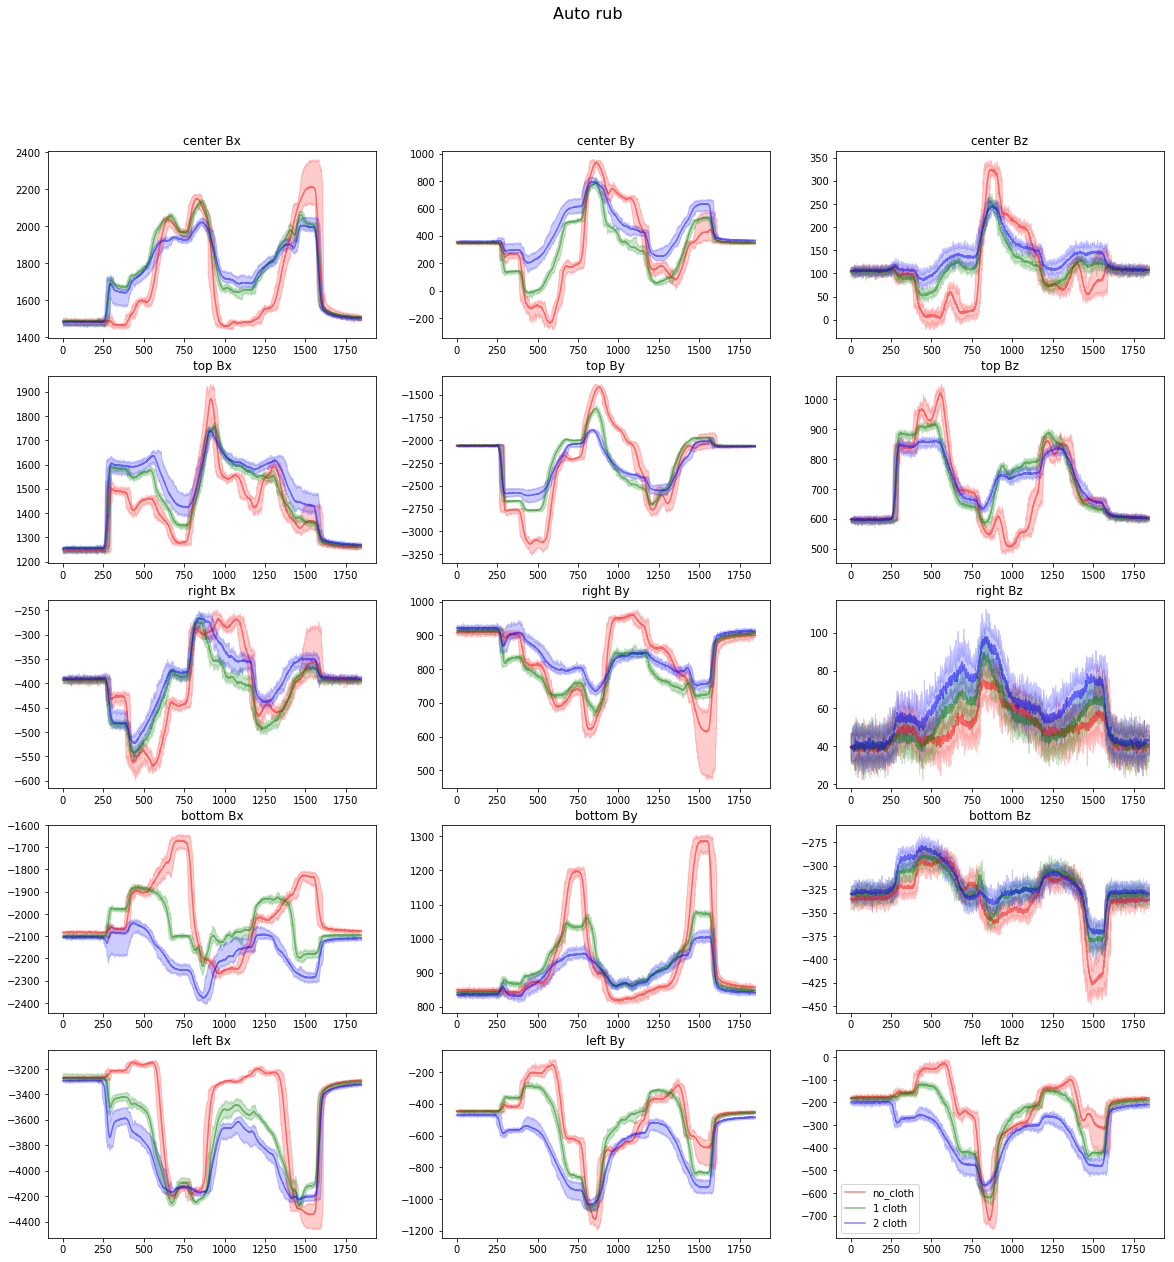

In [33]:
p1 = "/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/0cloth_vertrub_auto"
p2 = "/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/1cloth_vertrub_auto"
p3 = "/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/2cloth_vertrub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Auto rub", False)

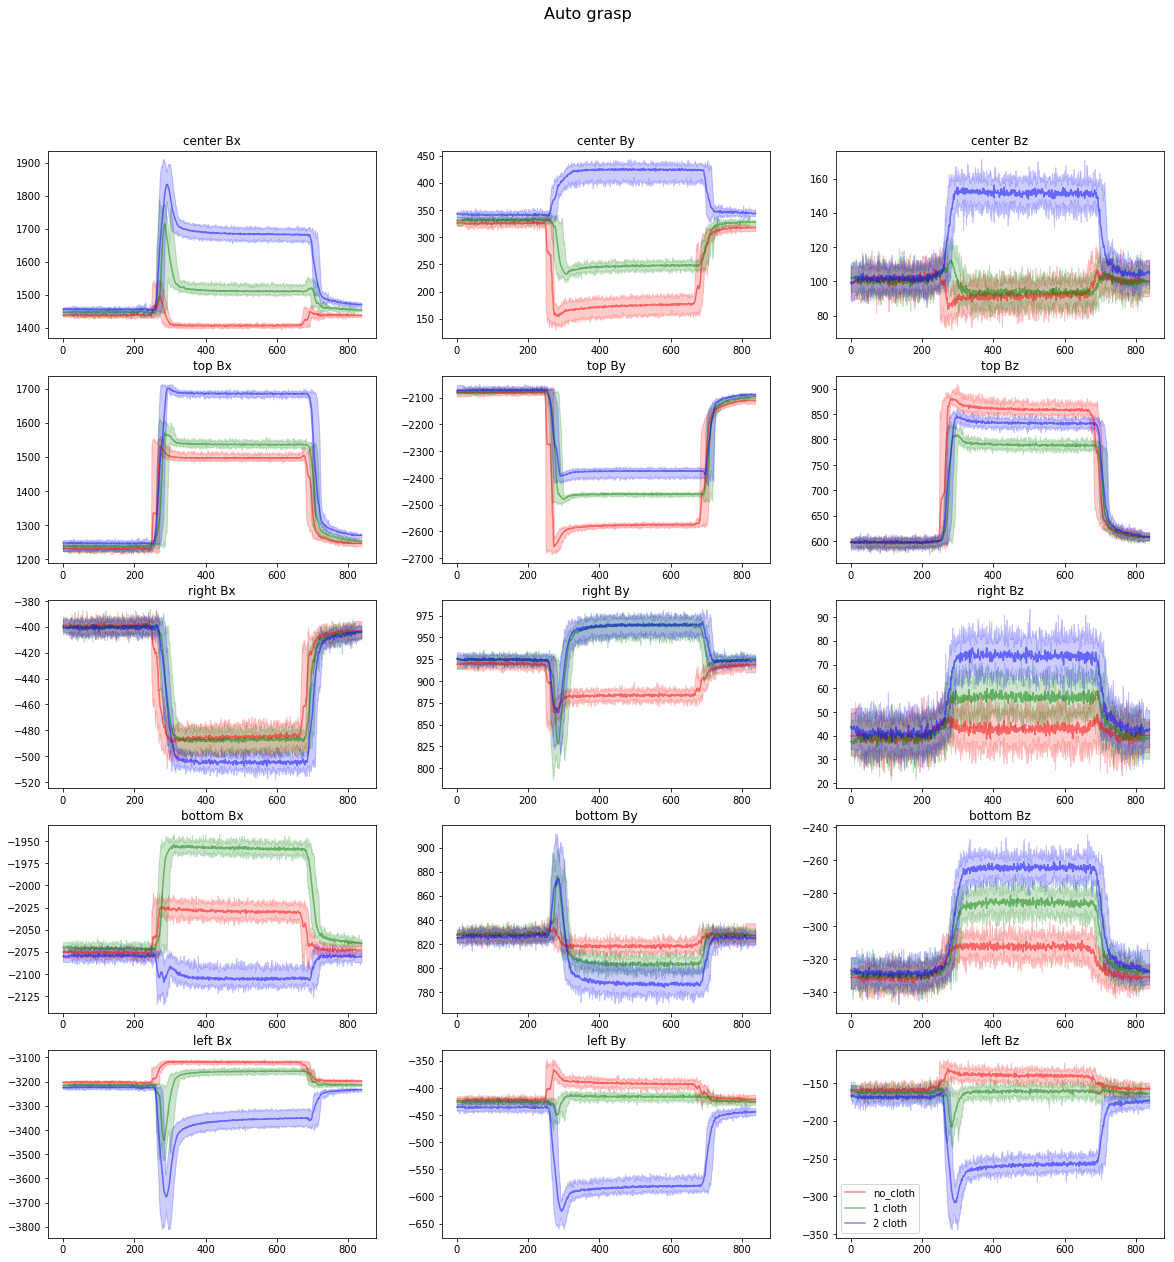

In [9]:
p1 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub/0cloth_norub_auto"
p2 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub/1cloth_norub_auto"
p3 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub/2cloth_norub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Auto grasp", True)

In [5]:
p1 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub/0cloth_norub_auto"
p2 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub/1cloth_norub_auto"
p3 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub/2cloth_norub_auto"
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10)

((23952, 15), (23952, 1), (11992, 15), (11992, 1))
('balanced accuracy: ', 0.9989621297507749)
('confusion_matrix: ', array([[5539,    2,    3,    0],
       [   4, 2154,    0,    0],
       [   1,    0, 2132,    0],
       [   2,    0,    0, 2155]]))


In [7]:
p1 = "/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/0cloth_vertrub_auto"
p2 = "/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/1cloth_vertrub_auto"
p3 = "/home/sashank/catkin_ws/src/tactilecloth/bagfiles/rub/2cloth_vertrub_auto"
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = False)

((54258, 15), (54258, 1), (27052, 15), (27052, 1))
('balanced accuracy: ', 0.9981298742022954)
('confusion_matrix: ', array([[7484,    3,    4,   18],
       [   1, 6529,    3,    0],
       [  21,    0, 6477,    0],
       [   2,    0,    0, 6510]]))


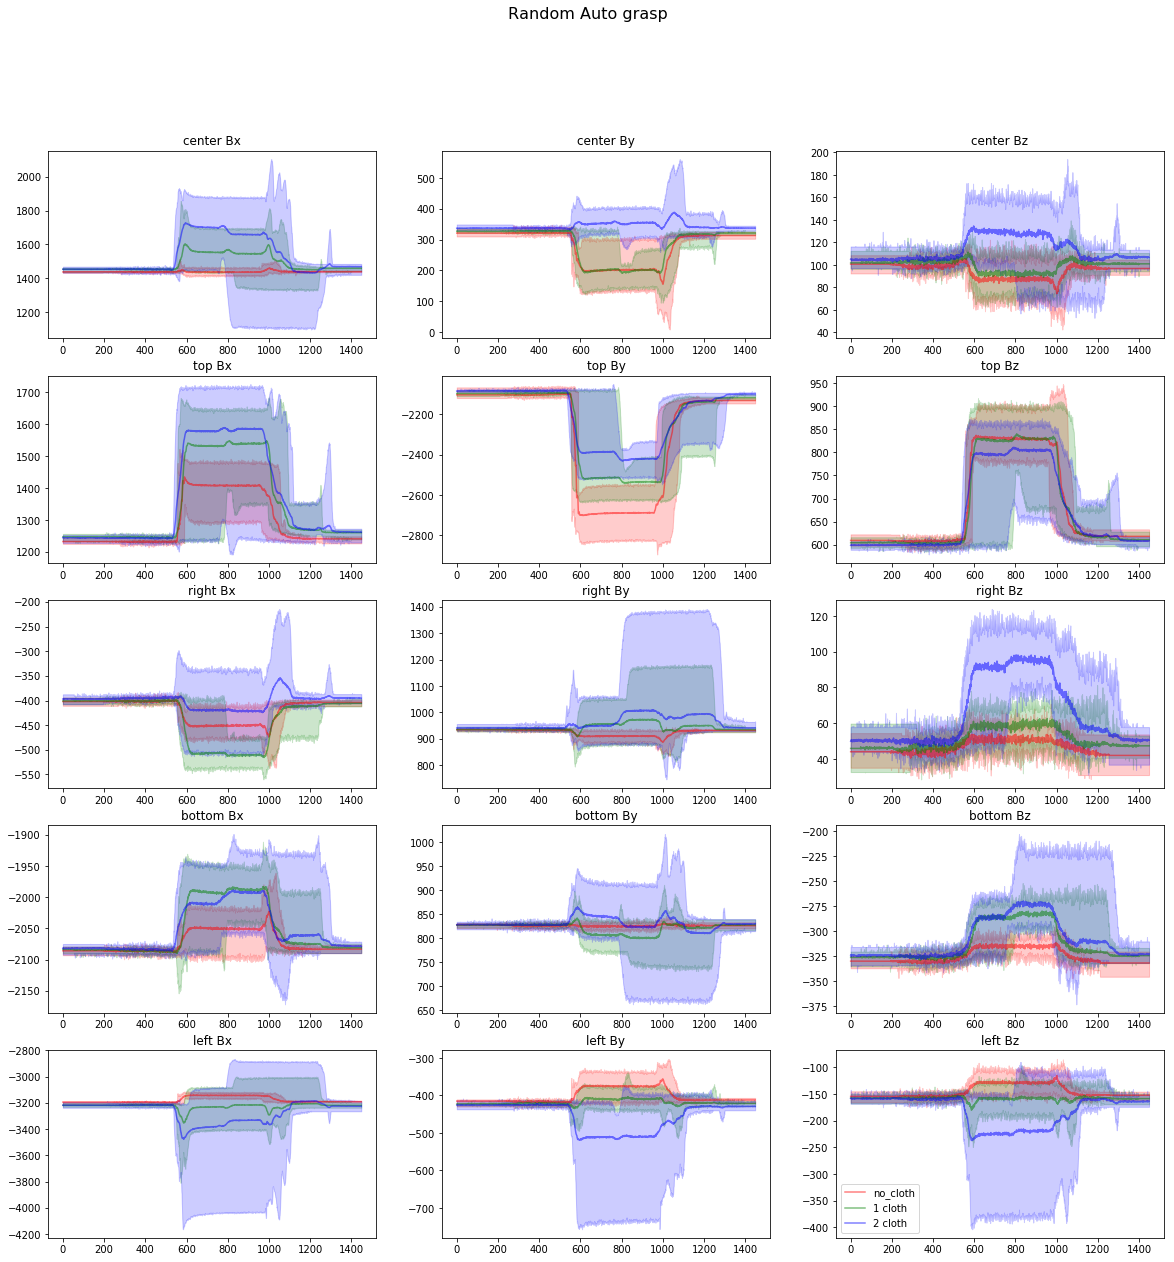

((27824, 15), (27824, 1), (13977, 15), (13977, 1))
('balanced accuracy: ', 0.9850289735221452)
('confusion_matrix: ', array([[6935,    6,    5,   41],
       [   5, 2268,    0,    0],
       [  87,    0, 2251,    0],
       [  21,    0,   10, 2348]]))


In [8]:
p1 = "/media/ExtraDrive3/tactilecloth/bagfiles/random_pinch/0cloth_randompinch_auto"
p2 = "/media/ExtraDrive3/tactilecloth/bagfiles/random_pinch/1cloth_randompinch_auto"
p3 = "/media/ExtraDrive3/tactilecloth/bagfiles/random_pinch/2cloth_randompinch_auto"
create_clf_plot_from_dir(p1,p2,p3,"Random Auto grasp", True)
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = True)

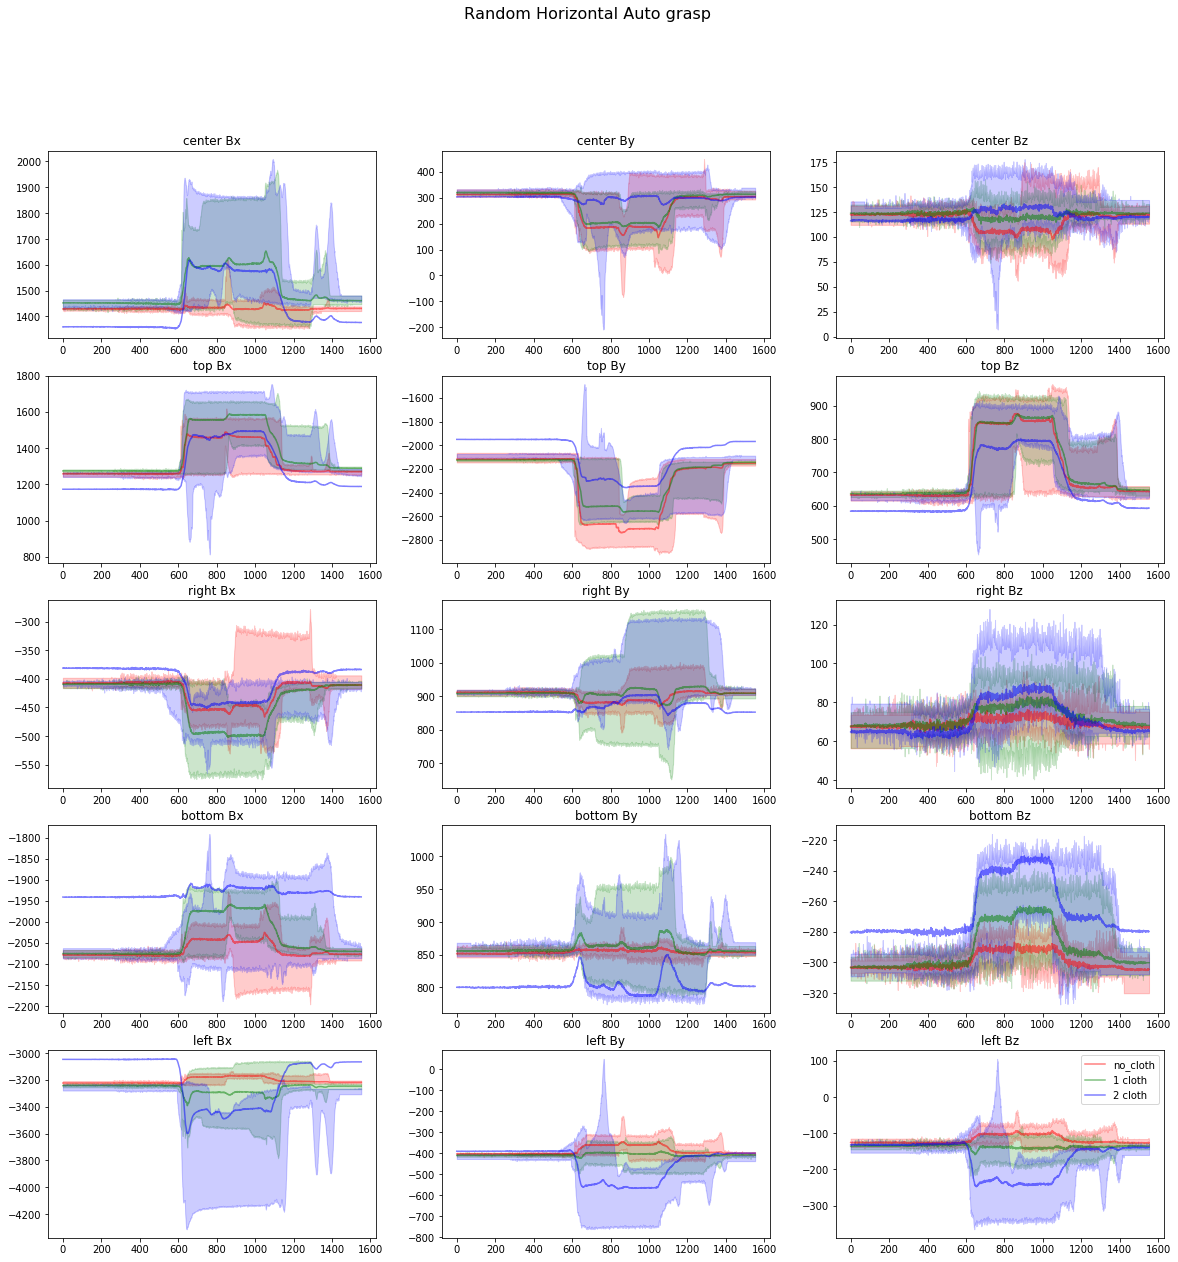

((30723, 15), (30723, 1), (13212, 15), (13212, 1))
('balanced accuracy: ', 0.8269587126866385)
('confusion_matrix: ', array([[6117,   40,   92,   18],
       [   5, 2211,    0,    0],
       [ 580,   19, 1800,  440],
       [  40,    0,  527, 1323]]))


In [12]:
p1 = "/media/ExtraDrive3/tactilecloth/bagfiles/hor_pinch/0cloth_randompinch_auto"
p2 = "/media/ExtraDrive3/tactilecloth/bagfiles/hor_pinch/1cloth_randompinch_auto"
p3 = "/media/ExtraDrive3/tactilecloth/bagfiles/hor_pinch/2cloth_randompinch_auto"
create_clf_plot_from_dir(p1,p2,p3,"Random Horizontal Auto grasp", True)
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = True)

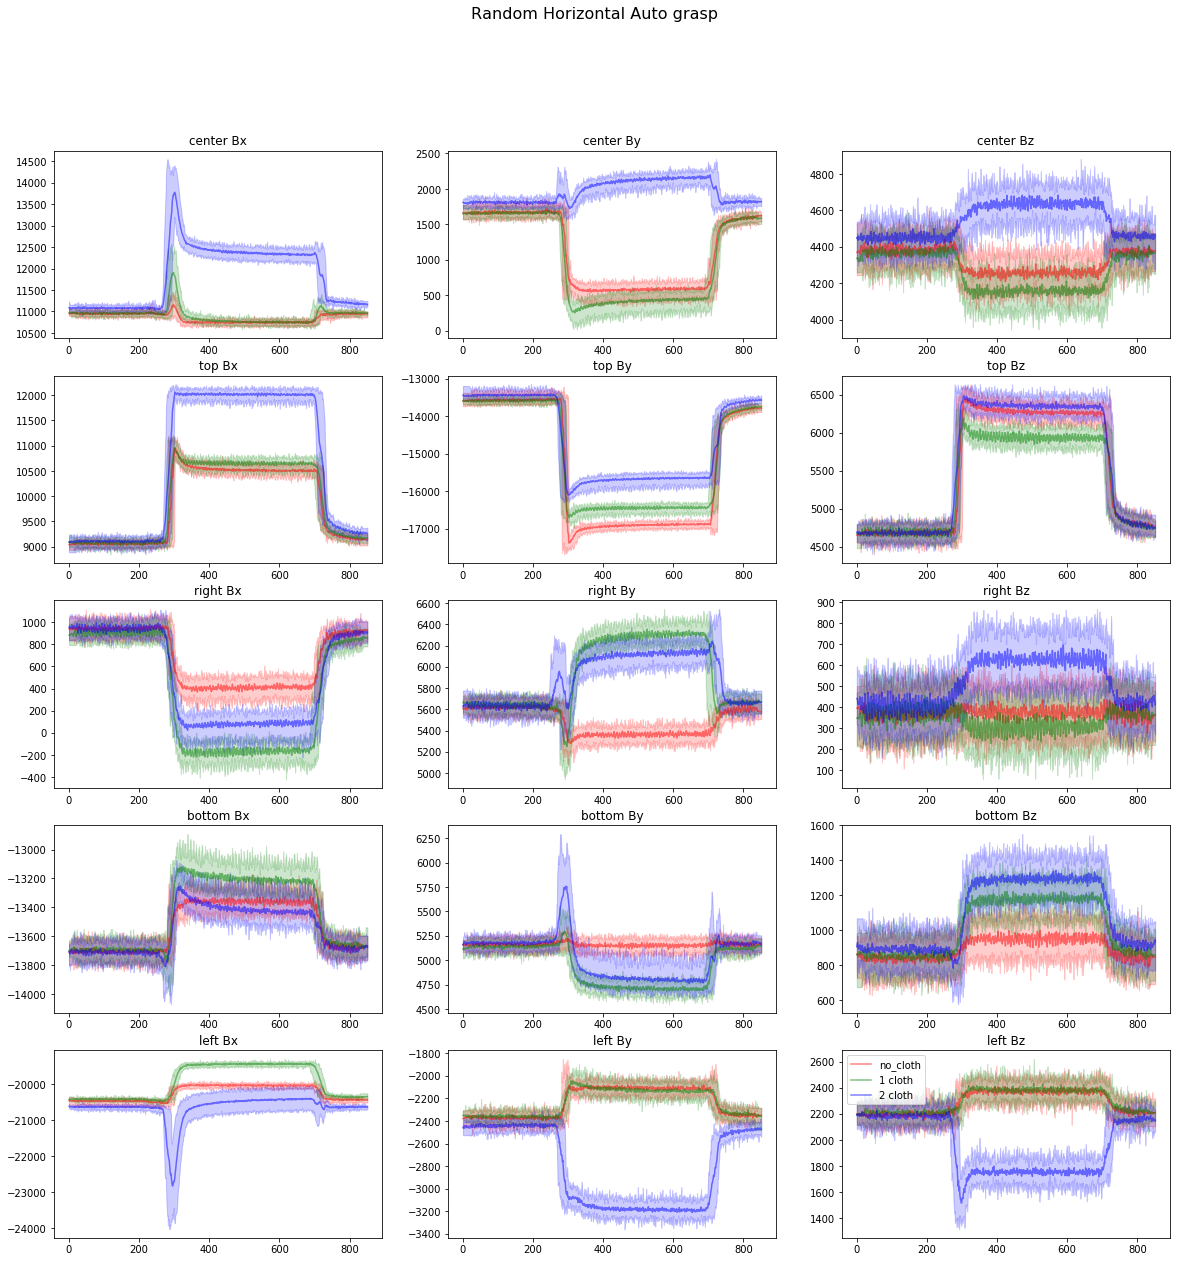

((24713, 15), (24713, 1), (12402, 15), (12402, 1))
('balanced accuracy: ', 0.9958125874175192)
('confusion_matrix: ', array([[5881,    8,   17,   14],
       [   5, 2123,    0,    0],
       [   9,    0, 2154,    0],
       [   8,    0,    0, 2183]]))


In [5]:
p1 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub_loose_hor/0cloth_norub_auto"
p2 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub_loose_hor/1cloth_norub_auto"
p3 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub_loose_hor/2cloth_norub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Random Horizontal Auto grasp", True)
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = True)

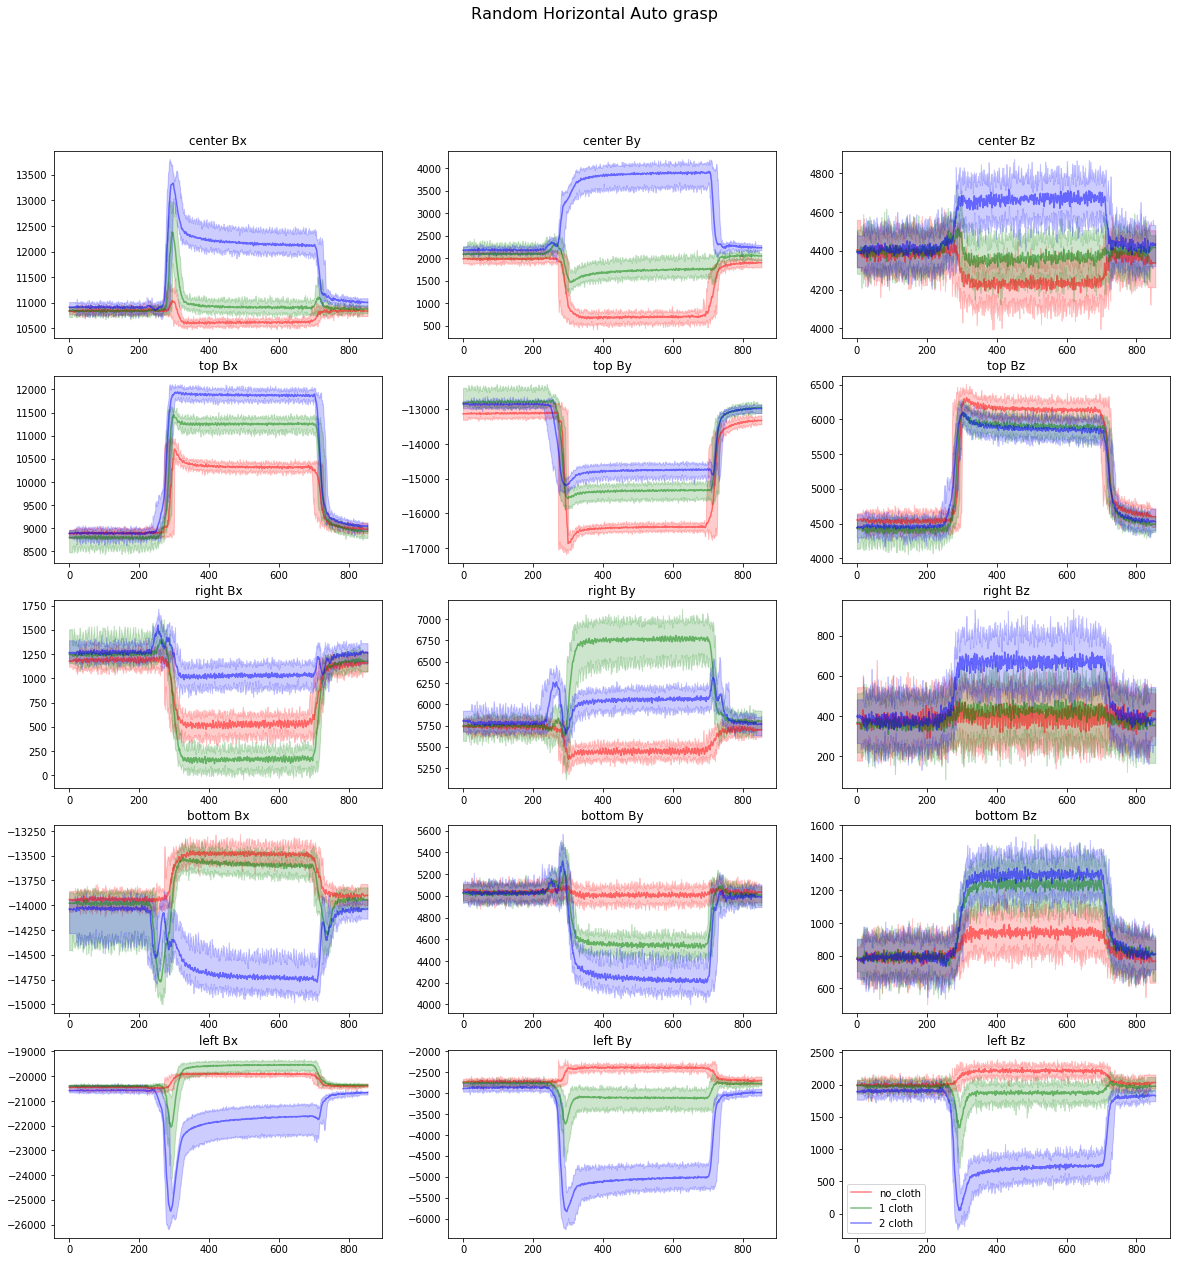

((24720, 15), (24720, 1), (12218, 15), (12218, 1))
('balanced accuracy: ', 0.9976573276158605)
('confusion_matrix: ', array([[5708,    5,    4,    5],
       [   5, 2118,    0,    0],
       [   4,    0, 2171,    0],
       [   6,    0,    0, 2192]]))


In [9]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/norub_table_folded/0cloth_norub_auto"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/norub_table_folded/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/norub_table_folded/2cloth_norub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Random Horizontal Auto grasp", True)
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = True)

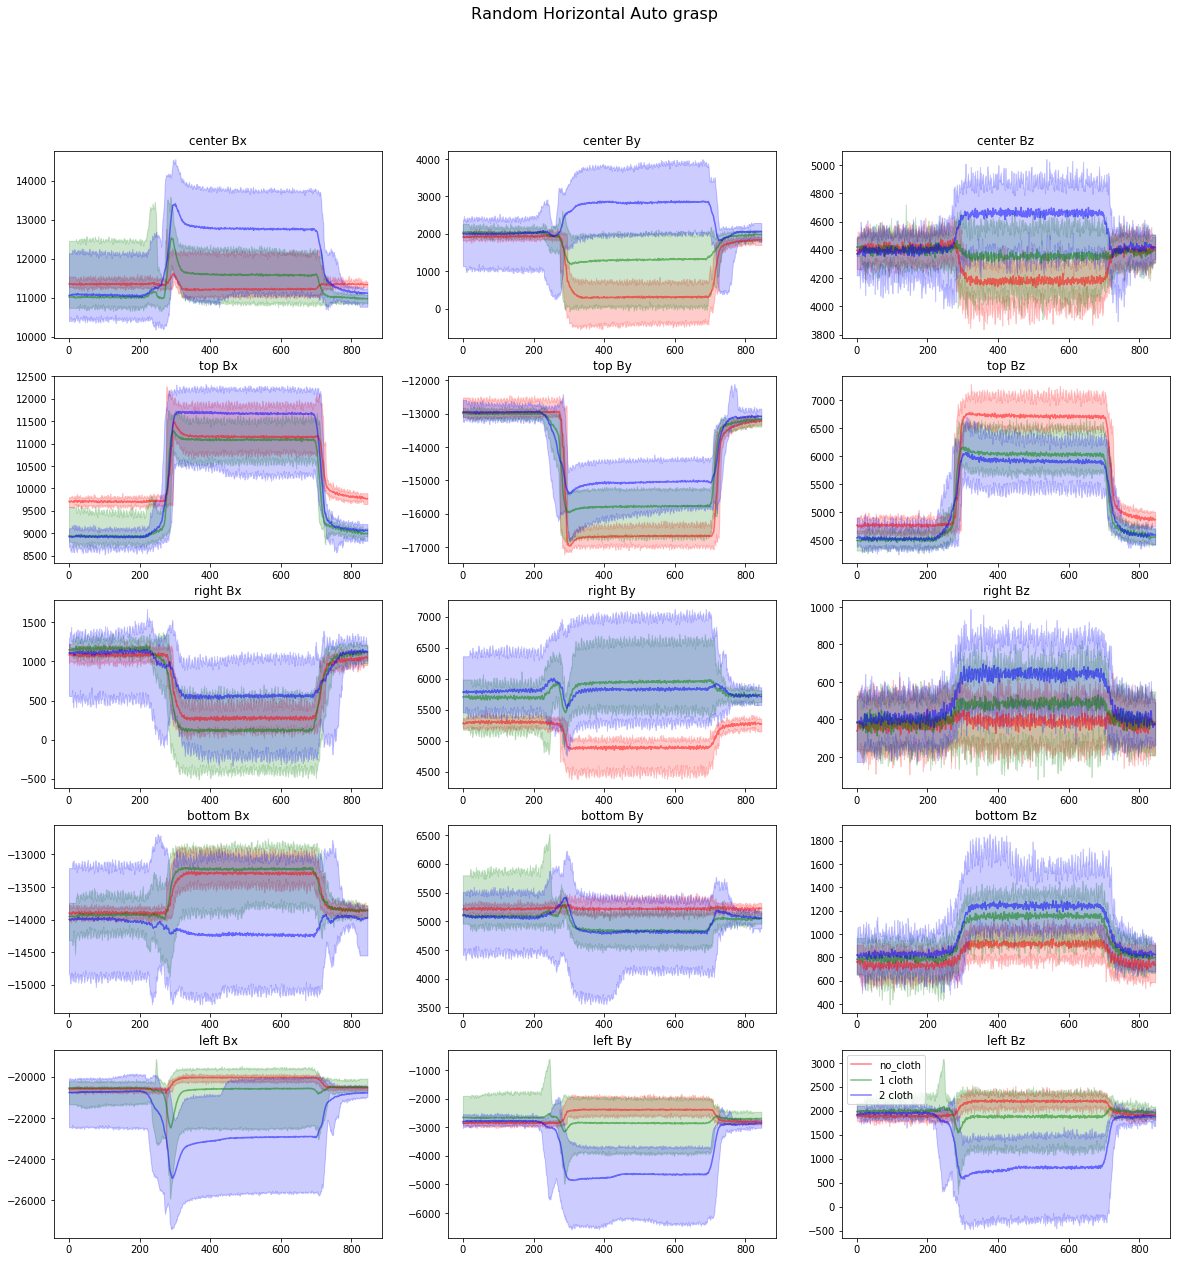

((24653, 15), (24653, 1), (12287, 15), (12287, 1))
('balanced accuracy: ', 0.9575224036377487)
('confusion_matrix: ', array([[5718,    0,    3,   17],
       [   7, 2169,    2,    0],
       [  54,  220, 1901,    3],
       [  17,    0,   60, 2116]]))


In [7]:
p1 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub_table_folded_random_manual/0cloth_norub_auto"
p2 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub_table_folded_random_manual/1cloth_norub_auto"
p3 = "/media/ExtraDrive3/tactilecloth/bagfiles/norub_table_folded_random_manual/2cloth_norub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Random Horizontal Auto grasp", True)
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = True)

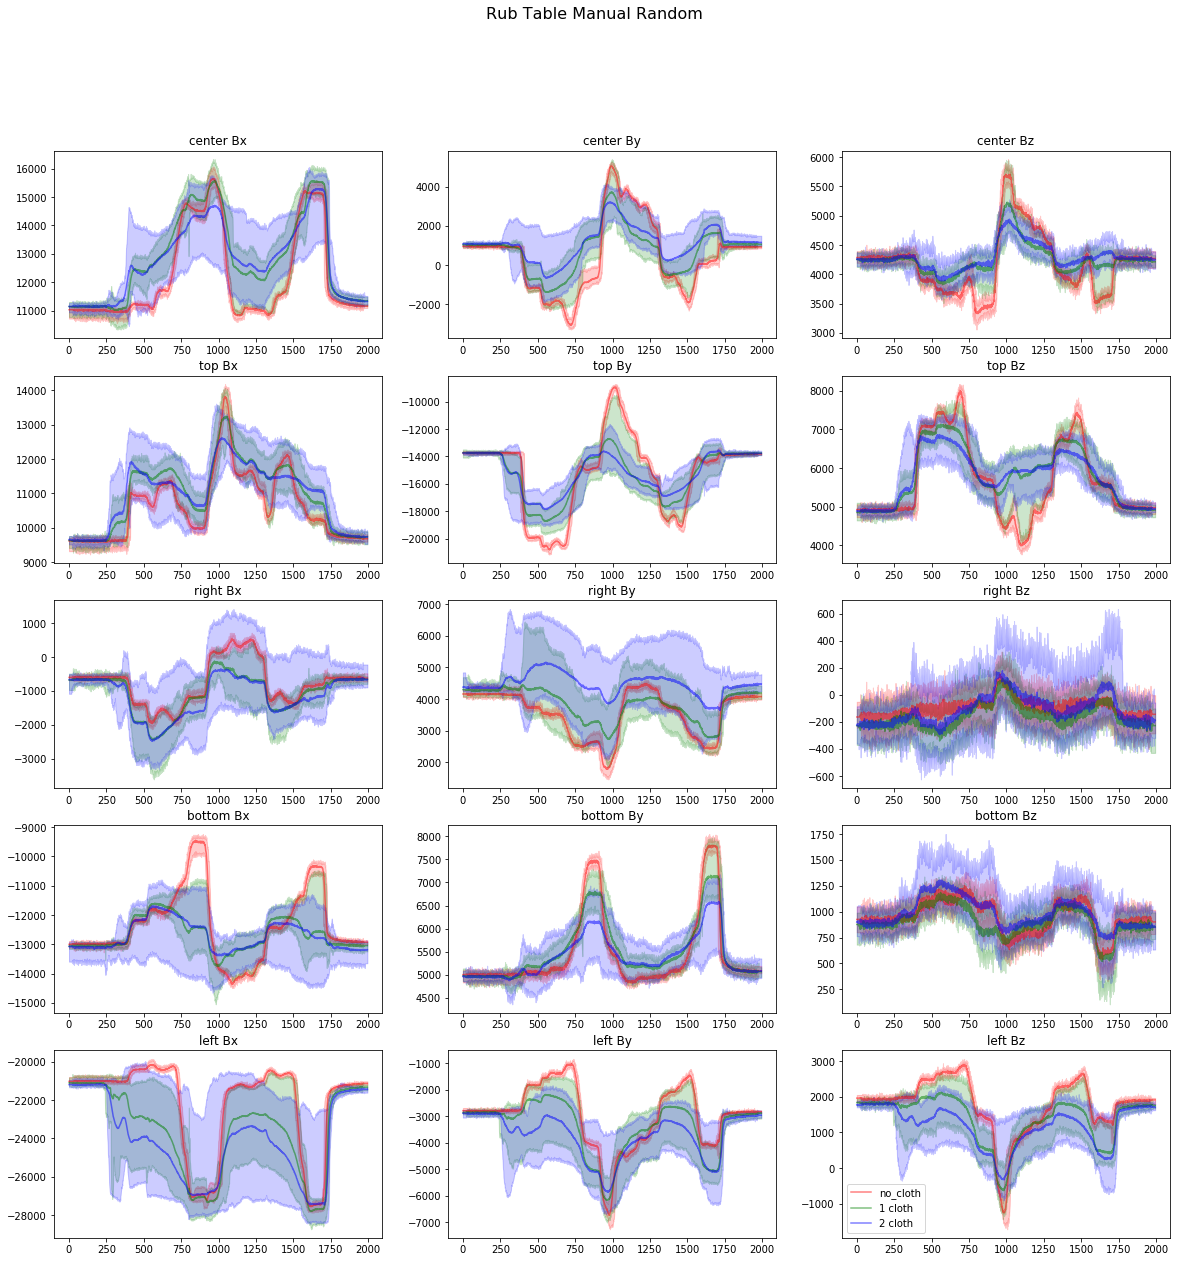

((58301, 15), (58301, 1), (29156, 15), (29156, 1))
('balanced accuracy: ', 0.8383634299791168)
('confusion_matrix: ', array([[8803,    6,  127,   40],
       [  10, 6539,   44,    2],
       [  42,    0, 4766, 1814],
       [ 203,   15, 2139, 4606]]))


In [6]:
p1 = "/media/ExtraDrive3/tactilecloth/bagfiles/rub_table_folded_random_manual/0cloth_vertrub_auto"
p2 = "/media/ExtraDrive3/tactilecloth/bagfiles/rub_table_folded_random_manual/1cloth_vertrub_auto"
p3 = "/media/ExtraDrive3/tactilecloth/bagfiles/rub_table_folded_random_manual/2cloth_vertrub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Rub Table Manual Random", True)
clf = create_knn_clf_from_dir(p1,p2,p3, num_train=10, nn = 10, new_collect = True)

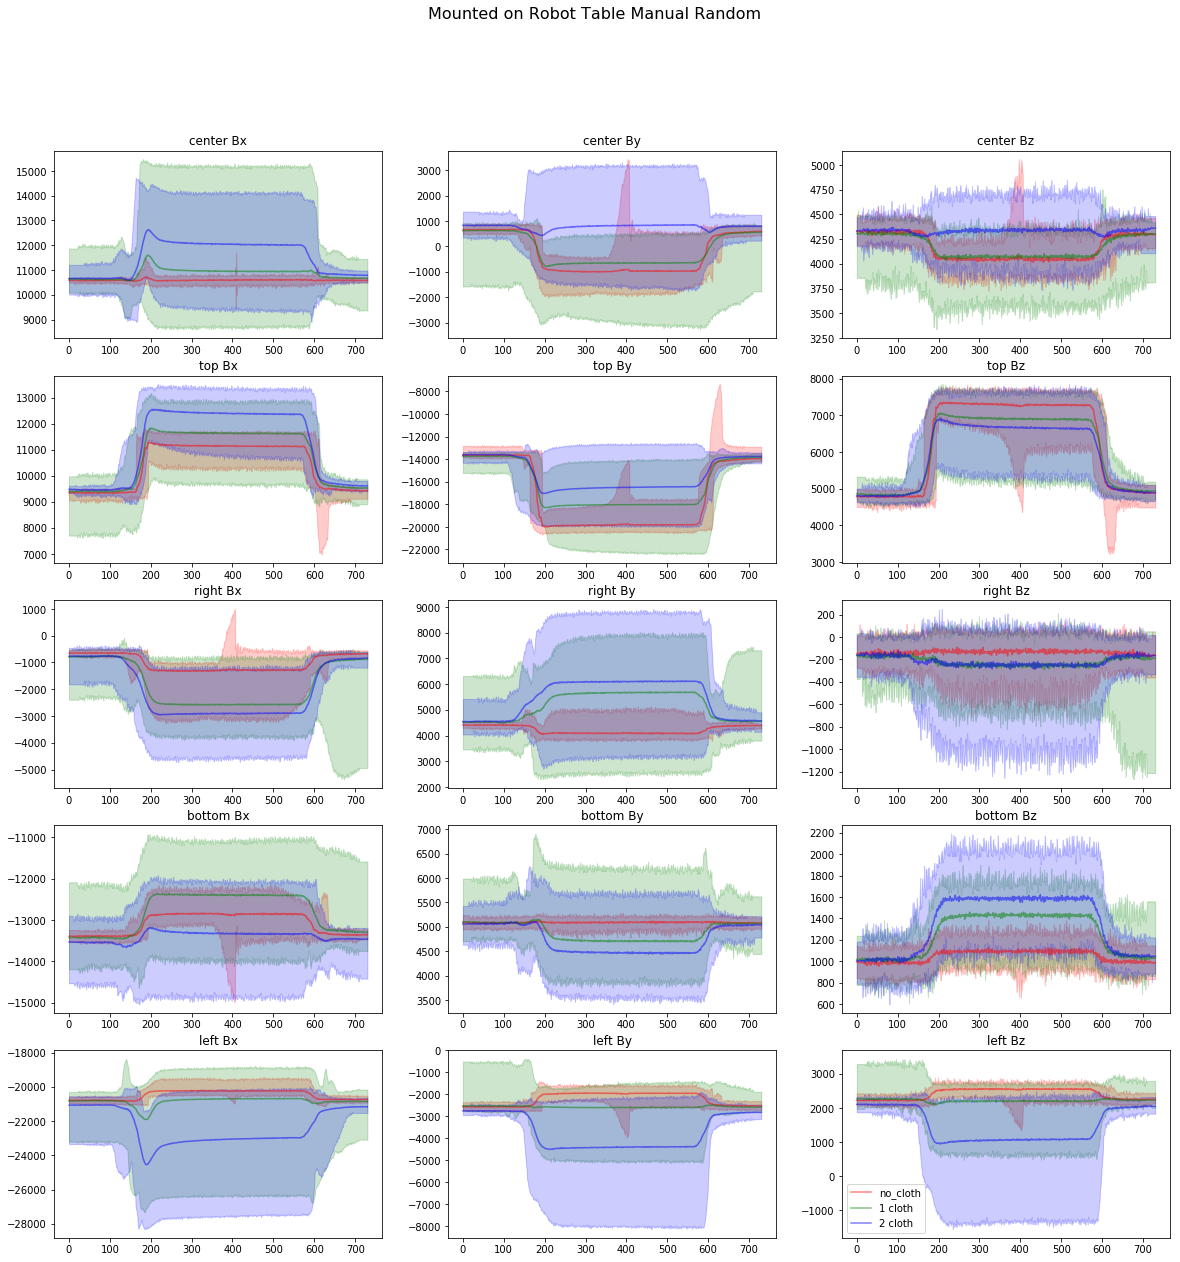

((72316, 15), (72316, 1), (20682, 15), (20682, 1))
('balanced accuracy: ', 0.9609996166610397)
('confusion_matrix: ', array([[8142,  191,  196,   41],
       [   9, 3708,    1,    0],
       [  82,    2, 3812,  274],
       [  47,    0,   27, 4150]]))


In [4]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/2cloth_norub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Mounted on Robot Table Manual Random", True, total_trials = 45)
clf, scaler = create_knn_clf_from_dir(p1,p2,p3, num_train=35, nn = 60, new_collect = True)

30
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/2022-02-13-03-11-21_0cloth_norub_auto : ', 0.9968998185482032)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/2022-02-13-03-11-25_0cloth_norub_auto : ', 0.9970914989840729)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/2022-02-13-03-11-29_0cloth_norub_auto : ', 0.996895813730374)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/2022-02-13-03-11-33_0cloth_norub_auto : ', 0.9970137033525812)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/2022-02-13-03-11-36_0cloth_norub_auto : ', 0.996983586519993)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/

/home/tweng/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/2022-02-13-03-11-51_0cloth_norub_auto : ', 0.46480938416422285)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto/2022-02-13-03-11-55_0cloth_norub_auto : ', 0.9957374177866742)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto/2022-02-13-03-12-42_1cloth_norub_auto : ', 0.9969655924570786)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto/2022-02-13-03-12-46_1cloth_norub_auto : ', 0.9954947210873346)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto/2022-02-13-03-12-50_1cloth_norub_auto : ', 0.8451633197191959)
('balanced accuracy - /media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto/

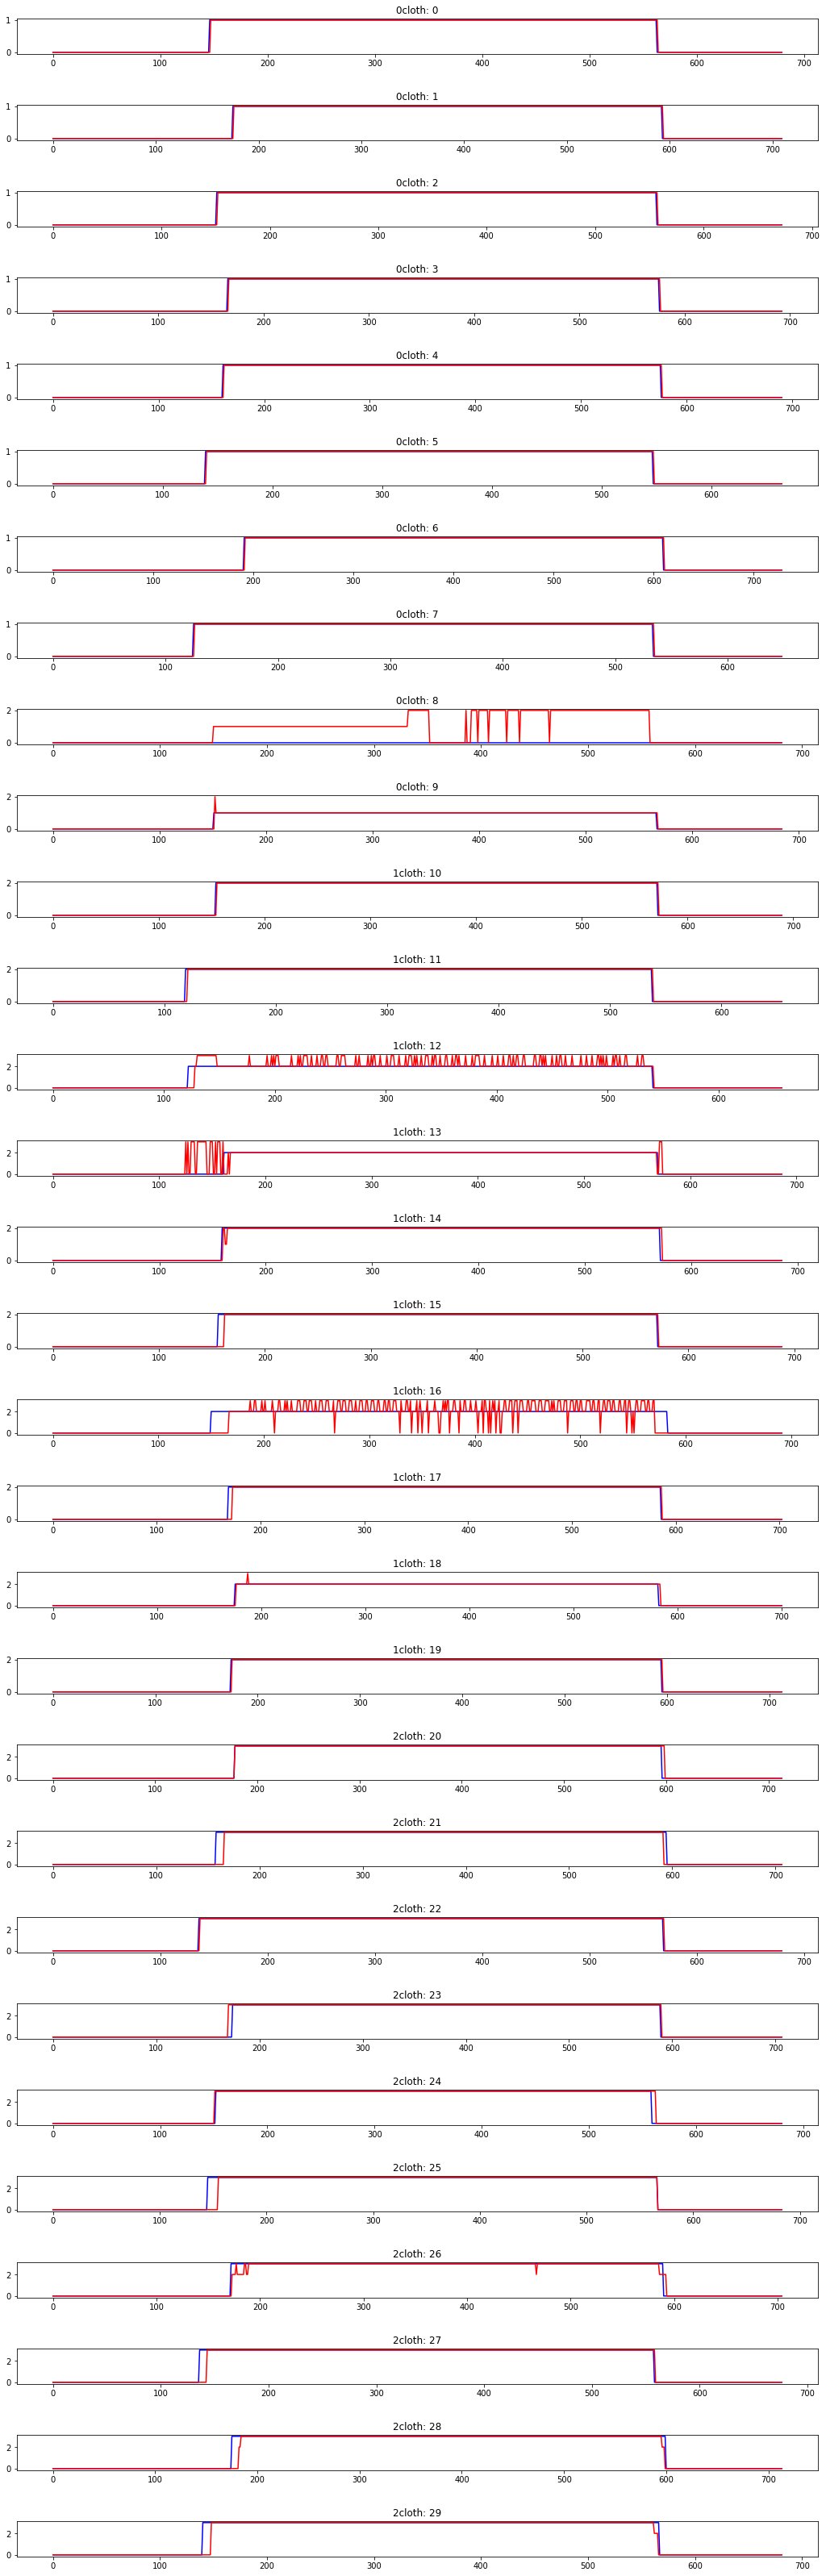

In [18]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/2cloth_norub_auto"
cloth0_dir_names, cloth1_dir_names, cloth2_dir_names = get_cloth_dir_names(p1, p2, p3)
train_dir_names, test_dir_names = get_dataset_dir_names(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, 35)
test_data_x, test_data_y = get_test_trials_3D(test_dir_names, scaler)
print(len(test_data_x))
plot_classifier_results(clf, test_data_x, test_data_y, test_dir_names)

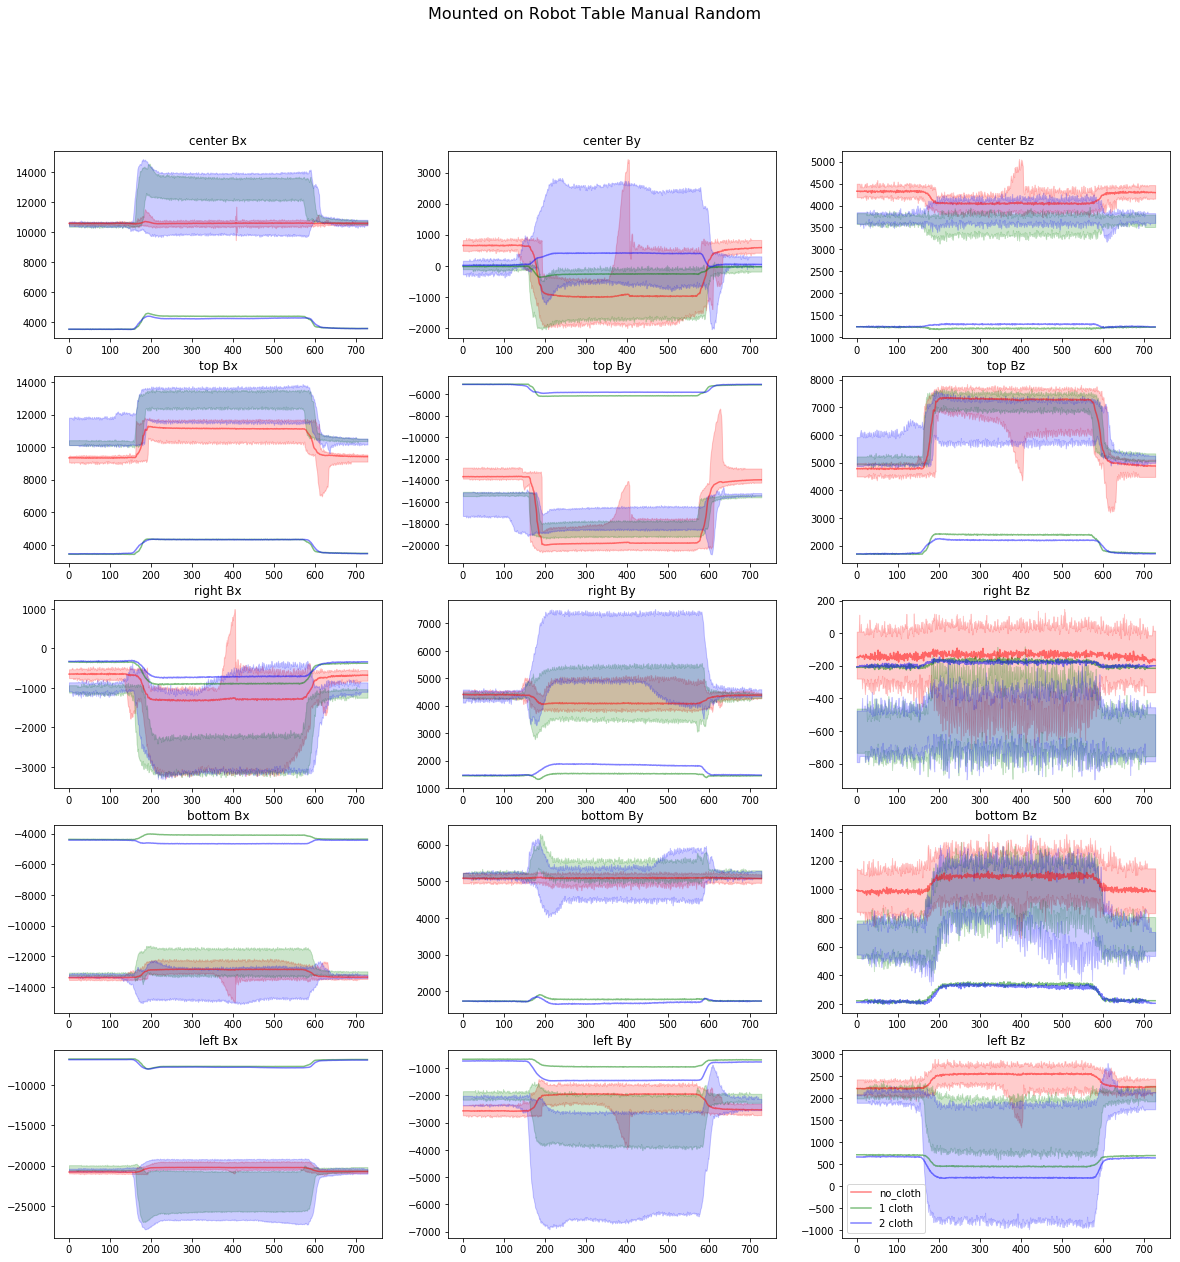

ValueError: need more than 4 values to unpack

In [13]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/striped_towel_fnfr/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/striped_towel_fnfr/2cloth_norub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Mounted on Robot Table Manual Random", True, total_trials = 45)
test_clf_data_dir_names(clf, p1,p2,p3)

In [17]:
test_clf_data_dir_names(clf, p1,p2,p3)

('balanced accuracy: ', 0.25)
('confusion_matrix: ', array([[    0,     0,     0, 20582],
       [    0,     0,     0, 18197],
       [    0,     0,     0,  6229],
       [    0,     0,     0,  6353]]))


In [15]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_base"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/striped_towel_fnfr/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/striped_towel_fnfr/2cloth_norub_auto"
get_clf_accuracy_from_dir(clf, scaler,[p1,p2,p3])

('balanced accuracy: ', 0.8905753444015204)
('confusion_matrix: ', array([[11501,     0,   296,   480],
       [    0,  6614,     0,     0],
       [   93,     0,  4137,  1899],
       [  262,     0,    56,  6109]]))


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=60, p=2,
            weights='distance'),
 StandardScaler(copy=True, with_mean=True, with_std=True))

In [12]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_base"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/green_cloth_fnfr/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/green_cloth_fnfr/2cloth_norub_auto"
get_clf_accuracy_from_dir(clf, scaler, [p1,p2,p3])

('balanced accuracy: ', 0.932807802202274)
('confusion_matrix: ', array([[11337,     5,   789,   231],
       [    0,  6614,     0,     0],
       [   28,    18,  5754,   109],
       [  152,     0,   879,  5428]]))


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=60, p=2,
            weights='distance'),
 StandardScaler(copy=True, with_mean=True, with_std=True))

In [14]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_base"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/paper_fnfr/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/paper_fnfr/2cloth_norub_auto"
get_clf_accuracy_from_dir(clf, scaler, [p1,p2,p3])

('balanced accuracy: ', 0.659508941525509)
('confusion_matrix: ', array([[10793,   561,   728,   362],
       [    0,  6614,     0,     0],
       [   67,  1244,  4356,     0],
       [  239,  1215,  5363,    14]]))


(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=60, p=2,
            weights='distance'),
 StandardScaler(copy=True, with_mean=True, with_std=True))

In [6]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/2cloth_norub_auto"
p4 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/3cloth_norub_auto"
# create_clf_plot_from_dir([p1,p2,p3,p4],"Mounted on Robot Table Manual Random", True, total_trials = 45)
# def get_cloth_dir_names_all(ps):
#     res=[]
#     for p in ps:
#         temp=[]
#         for dir in sorted(os.listdir(p)):
#             temp.append(p+"/"+dir)
#         res.append(temp)
#     return res

# def get_dataset_from_dir_names_all(cloth_dir_names, percent_train):
#     print(len(cloth_dir_names))
#     pass
clf, scaler = create_knn_clf_from_dir([p1,p2,p3,p4],nn = 10, percent_train=75.0)


((90882, 15), (90882, 1), (32185, 15), (32185, 1))
('balanced accuracy: ', 0.9264388859454966)
('confusion_matrix: ', array([[12251,     9,    14,    79,    80],
       [   11,  4525,     1,     0,     0],
       [  324,     1,  4596,    76,     0],
       [   83,     0,    20,  4236,   718],
       [  101,     0,     1,   455,  4604]]))


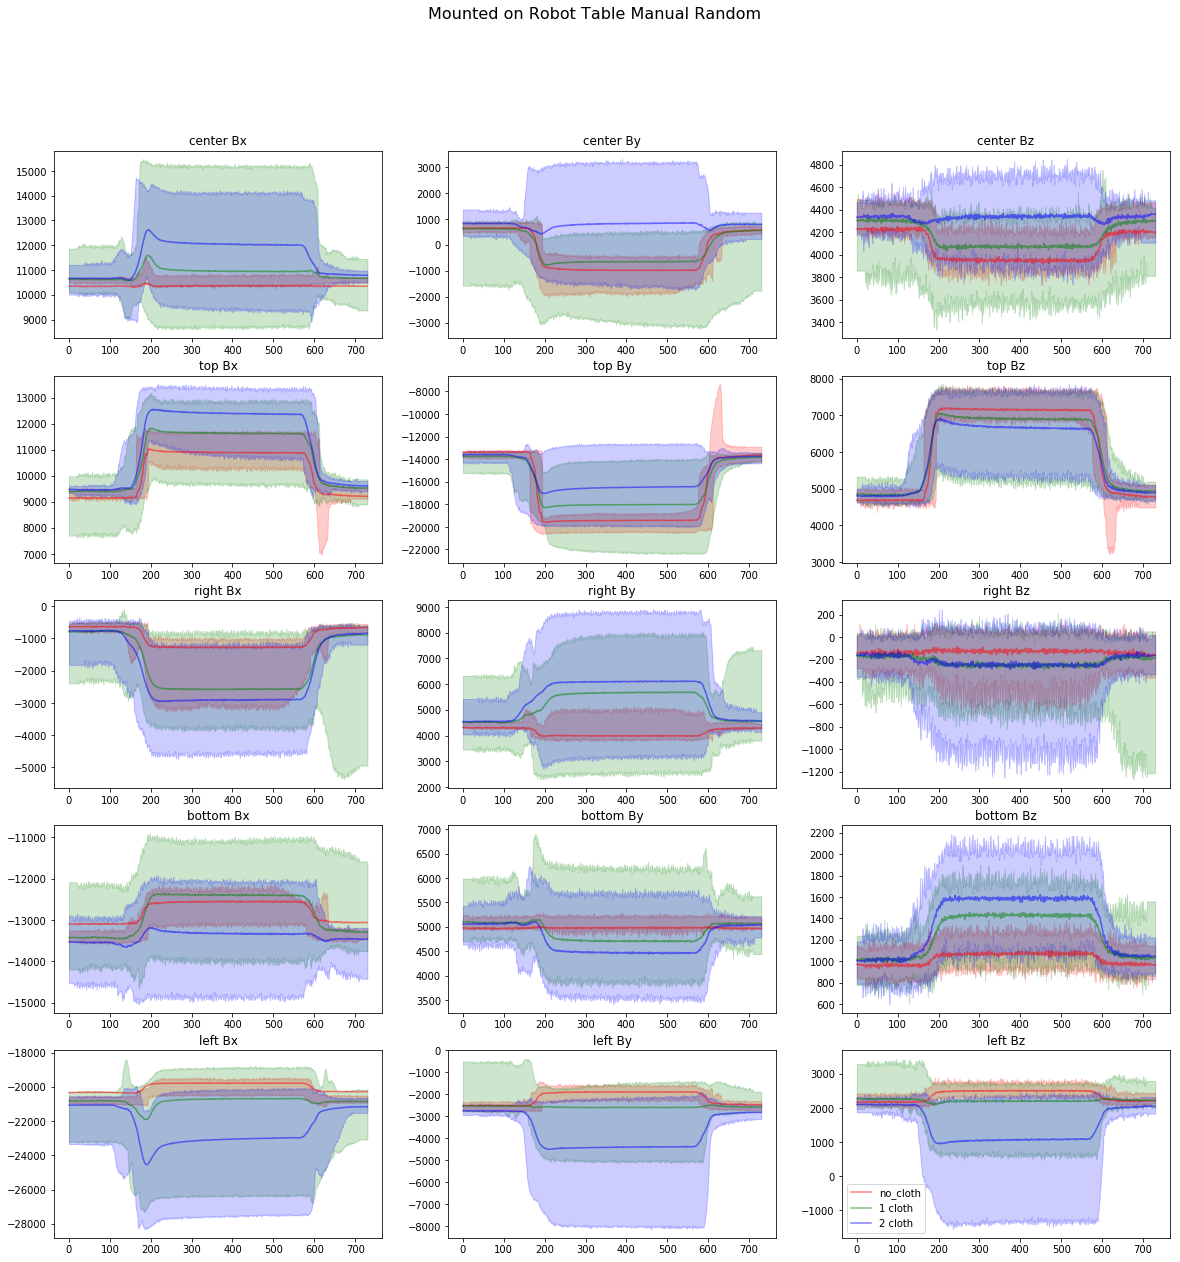

((72316, 15), (72316, 1), (20000, 15), (20000, 1))
('balanced accuracy: ', 0.9714883270427903)
('confusion_matrix: ', array([[7825,    9,   13,   41],
       [   9, 3708,    1,    0],
       [  82,    2, 3812,  274],
       [  47,    0,   27, 4150]]))


In [7]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/0cloth_norub_auto"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/1cloth_norub_auto"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random/2cloth_norub_auto"
create_clf_plot_from_dir(p1,p2,p3,"Mounted on Robot Table Manual Random", True, total_trials = 45)
clf, scaler = create_knn_clf_from_dir(p1,p2,p3, num_train=35, nn = 60, new_collect = True)

In [10]:
clfs=[]
nns = [1,10,20,35,41,60]
for current_nn in nns:
    clf, scaler = create_knn_clf_from_dir(p1,p2,p3, num_train=35, nn = current_nn , new_collect = True)
    print("done: ",current_nn)
    clfs.append(clf)
print(clfs)

((72316, 15), (72316, 1), (20000, 15), (20000, 1))
('balanced accuracy: ', 0.9594413723492355)
('confusion_matrix: ', array([[7799,   12,   12,   65],
       [  11, 3707,    0,    0],
       [ 457,    2, 3620,   91],
       [  55,    0,   13, 4156]]))
('done: ', 60)
((72316, 15), (72316, 1), (20000, 15), (20000, 1))
('balanced accuracy: ', 0.964975320881704)
('confusion_matrix: ', array([[7805,    7,   10,   66],
       [   9, 3708,    1,    0],
       [ 363,    0, 3709,   98],
       [  52,    0,   17, 4155]]))
('done: ', 60)
((72316, 15), (72316, 1), (20000, 15), (20000, 1))
('balanced accuracy: ', 0.9667150932027004)
('confusion_matrix: ', array([[7803,    8,   12,   65],
       [   9, 3708,    1,    0],
       [ 209,    1, 3745,  215],
       [  50,    0,   25, 4149]]))
('done: ', 60)
((72316, 15), (72316, 1), (20000, 15), (20000, 1))
('balanced accuracy: ', 0.9687920269903558)
('confusion_matrix: ', array([[7808,    8,   12,   60],
       [   9, 3708,    1,    0],
       [ 123,   

In [22]:
cloth0_dir_names, cloth1_dir_names, cloth2_dir_names = get_cloth_dir_names(p1, p2, p3)
X,Y,x,y,scaler = get_dataset_from_dir_names(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, num_train=35, new_collect=True)
def predict_from_ensemble(clfs, x):
    y_pred= np.zeros([x.shape[0], len(clfs)-1])
    for i in range(len(clfs)-1):
        y_pred[:,i] = clfs[i].predict(x)
    final_y = np.around(np.mean(y_pred, axis=1))
    return final_y
yf = predict_from_ensemble(clfs, x)
        

In [23]:
score = balanced_accuracy_score(y, yf)
print("balanced accuracy: ",score)

('balanced accuracy: ', 0.9688661532761794)


In [9]:
import pickle 
knnPickle = open('/media/tweng/ExtraDrive2/fabric_touch/classifiers/4classes_14Feb', 'wb')
pickle.dump(clf, knnPickle)
knnPickle.close()

with open('/media/tweng/ExtraDrive2/fabric_touch/classifiers/scaler_4classes_14Feb', 'wb') as scaler_fn:
    pickle.dump(scaler, scaler_fn)



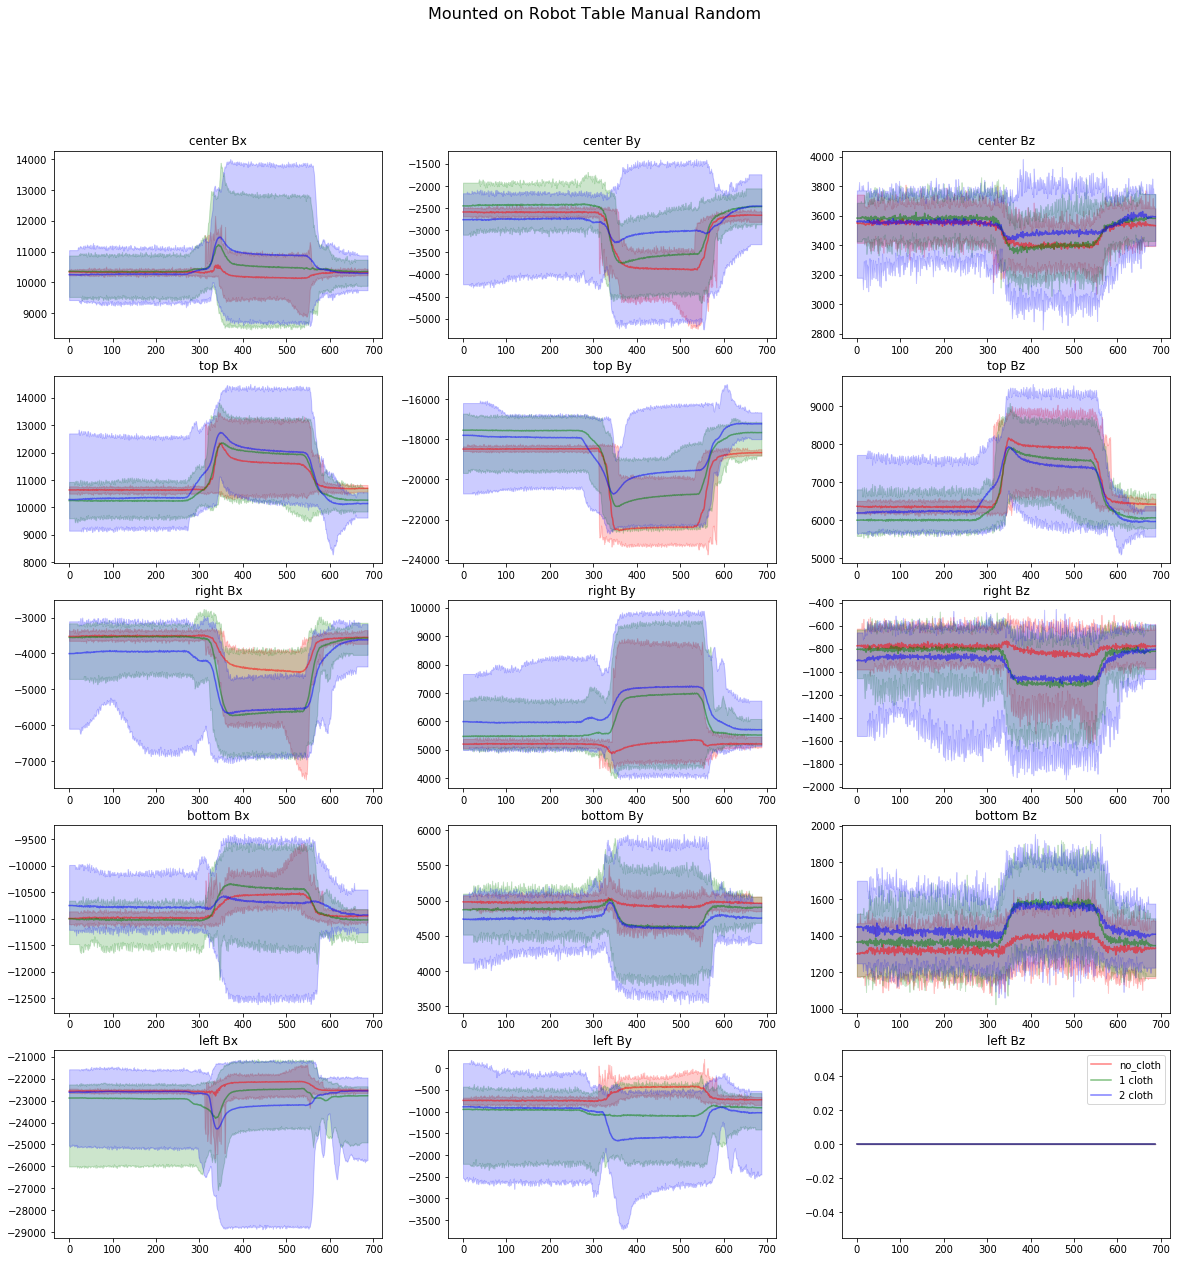

((67368, 14), (67368, 1), (19128, 14), (19128, 1))


ValueError: Unknown label type: 'continuous'

In [8]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random_18feb/0cloth_norub_auto_0"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random_18feb/1cloth_norub_auto_0"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random_18feb/2cloth_norub_auto_0"
create_clf_plot_from_dir(p1,p2,p3,"Mounted on Robot Table Manual Random", True, total_trials = 45)
clf, scaler = create_knn_clf_from_dir(p1,p2,p3, num_train=35, nn = 60, new_collect = True)

In [12]:
p1 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random_18feb/0cloth_norub_auto_0"
p2 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random_18feb/1cloth_norub_auto_0"
p3 = "/media/tweng/ExtraDrive2/fabric_touch/bagfiles/franka_norub_folded_random_18feb/2cloth_norub_auto_0"
cloth0_dir_names, cloth1_dir_names, cloth2_dir_names = get_cloth_dir_names(p1, p2, p3)
num_train=35
new_collect=True
X,Y,x,y,scaler = get_dataset_from_dir_names(cloth0_dir_names, cloth1_dir_names, cloth2_dir_names, num_train, new_collect)
print(X.shape, Y.shape, x.shape, y.shape)
# clf = neighbors.KNeighborsClassifier(nn, weights="distance")
# clf.fit(X, Y.ravel())
# y_pred = clf.predict(x)
# score = balanced_accuracy_score(y, y_pred)
# print("balanced accuracy: ",score)
# best_cf = confusion_matrix(y, y_pred)
# print("confusion_matrix: ", best_cf)
# return clf, scaler

((67368, 14), (67368, 1), (19128, 14), (19128, 1))


In [ ]:
def create_label_from_clf_command(bagfile, label):
    final_data=[]
    t_start = 0
    t_end = 0
    for topic, msg, t in bagfile.read_messages(topics=['/classifier_commands']):
        if topic == '/classifier_commands':
            data = np.array(msg.data) # 5 x (T x y z)
            if(data=="start"):
                t_start = t
            if(data=="end"):
                t_end = t
    
    for topic, msg, t in bagfile.read_messages(topics=['/reskin']):
        if topic == '/classifier_commands':
            if topic == '/reskin':
                data = np.array(msg.data) # 5 x (T x y z)
                new_data = [data[1], data[2], data[3], data[5], data[6], data[7],
                data[9], data[10], data[11], data[13], data[14], data[15], data[17], data[18], data[19]]
                if(t > t_start and t<t_end):
                    new_data.append(label)
                else:
                    new_data.append(0)

                final_data.append(new_data)
    
    
    new_data = [data[1], data[2], data[3], data[5], data[6], data[7],
            data[9], data[10], data[11], data[13], data[14], data[15], data[17], data[18], data[19], int(str(t))]
            final_data.append(new_data)
    final_data = np.array(final_data)
    x_dat_without_time = final_data[:,:-1]
    labelled_data = label_data(x_dat_without_time, label) 
    final_data = np.hstack([labelled_data, final_data[:,-1:]])
    bar.finish()
    return final_data
    